## Netflix Hackathon

In [4]:
# import zipfile
# with zipfile.ZipFile('archive (2).zip', 'r') as zip_ref:
#     zip_ref.extractall()

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('netflix_titles.csv', index_col='show_id')

Number of elements:  8807

 Null counts:


director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

Example Cleaning and Preprocessing Steps:

1. Convert Data Types:\
· Ensure that the ' date_added' column is in datetime format.\
· Ensure that the ' release_year' column is in the correct numeric format.

2. Create Additional Features:\
· Extract month and year from the ' date_added' column for time-based analysis.

3. Handle Missing Values:\
· For numeric columns, fill in missing values with the mean or median.\
· For categorical columns 'rating', 'duration' and 'country', fill missing values with the mode or a\
placeholder like "Unknown", “Not Rated”

4. Clean Categorical Data:\
· Standardize capitalization in categorical columns 'type' and 'rating' for consistency.

5. Remove Duplicates:\
· Check for and remove any duplicate entries.

6. Handle Outliers (Optional):\
· Investigate and handle any outliers in colum

#### 1&2. dtypes and feature creation

In [54]:
#converting dtypes and extracting features

df['date_added'] = pd.to_datetime(df['date_added'].str.strip())
df['release_year'] = df['release_year'].astype('float64') 
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

#### 3. Dealing with nulls

##### still to do: rating and date/month/year added

In [65]:
#Prepping cols in case we wanted a different imputation strategy
catcols = [col for col in df.columns if df[col].dtype == 'object']
nancols = [col for col in df.columns if df[col].isna().sum() >0]
numnancols = [col for col in nancols if col not in catcols]
catnancols = [col for col in nancols if col in catcols]
print(catnancols, numnancols)

['director', 'cast', 'country', 'rating', 'duration'] ['date_added', 'month_added', 'year_added']


##### country director cast 
    - fill Unknown?
##### rating and duration 
    - look up actual values
##### Not sure how to treat date, month year added cols 
    (possibly look up)

In [87]:
#filling cats with 'Unknown'

for col in ['director','cast','country']:
    df[col] = df[col].fillna('Unknown')

# df

In [90]:
# df.isna().sum()

##### date, month and year added 
    to fix, don't know how
##### rating and duration 
    to look up

#### 4. Good format of capitalisation for 'rating' and 'duration' - was fine, but did move some missplaced data

##### Double check

##### Capitalisation seems standardised; but there are a few rating values in duration;

In [93]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [120]:
display(df['rating'][df['rating'] == ('74 min')],
df['rating'][df['rating'] == ('84 min')],
df['rating'][df['rating'] == ('66 min')])


show_id
s5542    74 min
Name: rating, dtype: object

show_id
s5795    84 min
Name: rating, dtype: object

show_id
s5814    66 min
Name: rating, dtype: object

In [133]:
weird_is = df.loc[['s5542','s5795','s5814'],:].index

for i in weird_is:
    df.loc[i,'duration'] = df.loc[i,'rating']
    df.loc[i,'rating'] = np.nan

df.loc[weird_is]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
show_id,,,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017.0,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",4.0,2017.0
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010.0,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,9.0,2016.0
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015.0,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...,8.0,2016.0


#### 5. Removing Duplicates

##### Double check

In [141]:
print(len(df))
df.index.nunique()

8807


8807

In [147]:
for col in df.columns:
    print(col, df[col].nunique())
# df.description.nunique()

type 2
title 8807
director 4529
cast 7693
country 749
date_added 1714
release_year 74
rating 14
duration 220
listed_in 514
description 8775
month_added 12
year_added 14


In [150]:
df.description.value_counts()[df.description.value_counts() >1]

description
Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
Secrets bubble to the surface after a sensual encounter and an unforeseen crime entangle two friends and a woman caught between them.                        2
On India's Independence Day, a zany mishap in a Mumbai chawl disrupts a young love story while compelling the residents to unite in aid of a little boy.     2
With their biggest foe seemingly d

In [151]:
df[df.description == 'A young Han Solo tries to settle an old score with the help of his new buddy Chewbacca, a crew of space smugglers and a cunning old friend.']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
show_id,,,,,,,,,,,,,
s8052,Movie,Solo: A Star Wars Story,Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",United States,2019-01-09,2018.0,PG-13,135 min,"Action & Adventure, Children & Family Movies, ...",A young Han Solo tries to settle an old score ...,1.0,2019.0
s8053,Movie,Solo: A Star Wars Story (Spanish Version),Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",United States,2019-01-09,2018.0,PG-13,135 min,"Action & Adventure, Children & Family Movies, ...",A young Han Solo tries to settle an old score ...,1.0,2019.0


In [152]:
df[df.description == 'Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
show_id,,,,,,,,,,,,,
s237,Movie,Boomika,Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",Unknown,2021-08-23,2021.0,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope...",8.0,2021.0
s238,Movie,Boomika (Hindi),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",Unknown,2021-08-23,2021.0,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope...",8.0,2021.0
s239,Movie,Boomika (Malayalam),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",Unknown,2021-08-23,2021.0,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope...",8.0,2021.0
s240,Movie,Boomika (Telugu),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",Unknown,2021-08-23,2021.0,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope...",8.0,2021.0


##### Don't seem to be duplicates, just different translations

#### 6. Handling outliers

type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
month_added     10
year_added      10
dtype: int64

#### Analysis

In [161]:
df.head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
show_id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0


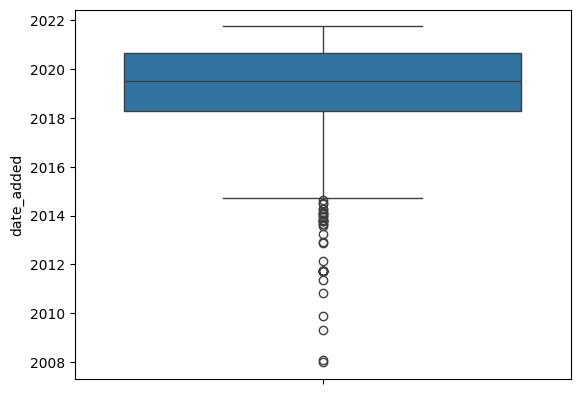

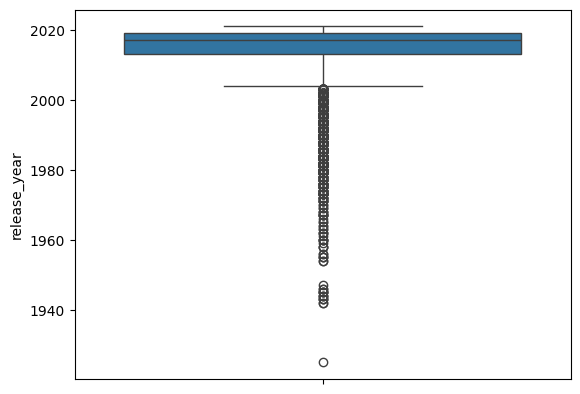

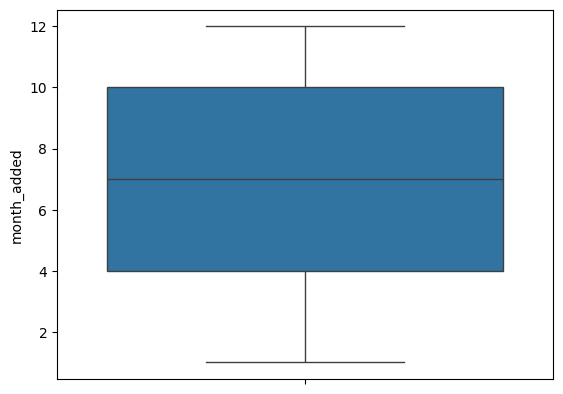

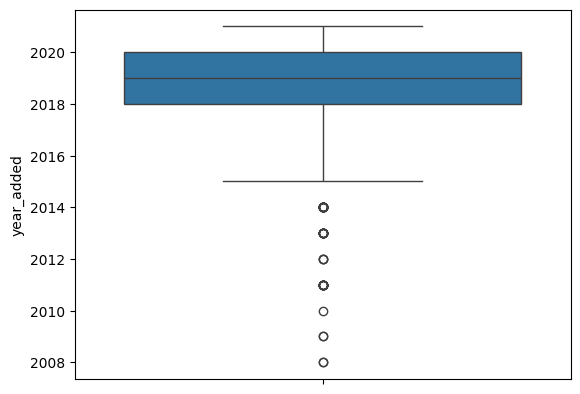

In [170]:

for col in [col for col in df.select_dtypes(exclude='object').columns]:
    try:
        plt.figure()
        sns.boxplot(data=df, y=col)
        plt.show()
    except:print('n')

missing director and cast cannot be dealt with manually, too many missing elements.
    reason they are missing?

country similar

date added, rating and duration can be checked and added.

In [158]:
df.groupby('director').count().sort_values(by='title',ascending=False).head()

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
director,,,,,,,,,,,,
Unknown,2634,2634,2634,2634,2624,2634,2631,2634,2634,2634,2624,2624
Rajiv Chilaka,19,19,19,19,19,19,19,19,19,19,19,19
"Raúl Campos, Jan Suter",18,18,18,18,18,18,18,18,18,18,18,18
Marcus Raboy,16,16,16,16,16,16,16,16,16,16,16,16
Suhas Kadav,16,16,16,16,16,16,16,16,16,16,16,16


In [157]:
# df[df['director']=='Rajiv Chilaka']